<a href="https://www.kaggle.com/code/decentsanage/food-delivery-model-pipeline?scriptVersionId=193797310" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb

In [3]:
paneer_data = {
    "Base Quantity (ML)": [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500],
    "Paneer (g)": [85, 175, 265, 355, 450, 535, 620, 710, 790, 870],
    "Preparation Time (min)": [6, 7, 9, 11, 13, 15, 16, 17, 18, 22] + abs(np.random.normal(0, 0.5, 10)),
    "Cooking Time (min)": [11, 14, 16, 21, 26, 30, 36, 42, 46, 50] + abs(np.random.normal(0, 1.5, 10)),
    "Packaging Time (min)": [2, 2, 2, 2, 3, 3, 3, 4, 4, 4] + np.random.normal(0, 0.5, 10)
}

# Chicken Curry (Non-Vegetarian Dish)
chicken_data = {
    "Base Quantity (ML)": [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500],
    "Chicken (g)": [105, 210, 310, 400, 510, 610, 710, 815, 920, 1020],
    "Preparation Time (min)": [9, 12, 13, 15, 17, 20, 21, 23, 25, 27] + abs(np.random.normal(0, 1.5, 10)),
    "Cooking Time (min)": [16, 20, 25, 28, 36, 38, 43, 48, 52, 55] + abs(np.random.normal(0, 1.5, 10)),
    "Packaging Time (min)": [2, 2, 2, 3, 3, 3, 4, 4, 4, 4] + np.random.normal(0, 0.5, 10)
}

In [4]:
df_paneer = pd.DataFrame(paneer_data)
df_chicken = pd.DataFrame(chicken_data)
df_paneer.head()

,Base Quantity (ML),Paneer (g),Preparation Time (min),Cooking Time (min),Packaging Time (min)
0,250,85,6.070795,12.531170,1.709005
1,500,175,7.111875,14.327085,2.232271
2,750,265,9.566125,17.557647,1.145440
3,1000,355,11.340495,22.302959,2.111552
4,1250,450,13.252540,26.976013,2.527157


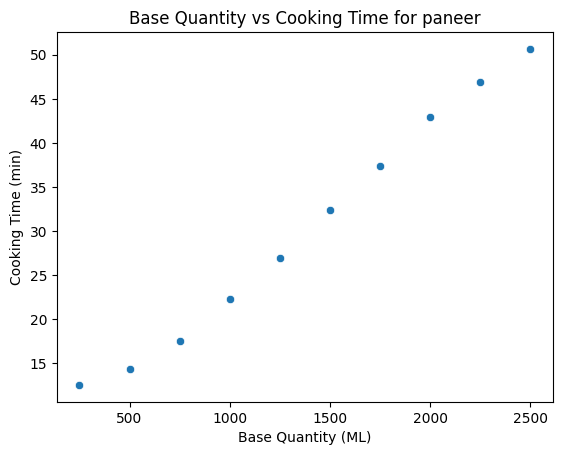

In [5]:
sns.scatterplot(x='Base Quantity (ML)', y='Cooking Time (min)', data=df_paneer)
plt.title('Base Quantity vs Cooking Time for paneer')
plt.xlabel('Base Quantity (ML)')
plt.ylabel('Cooking Time (min)')
plt.show()

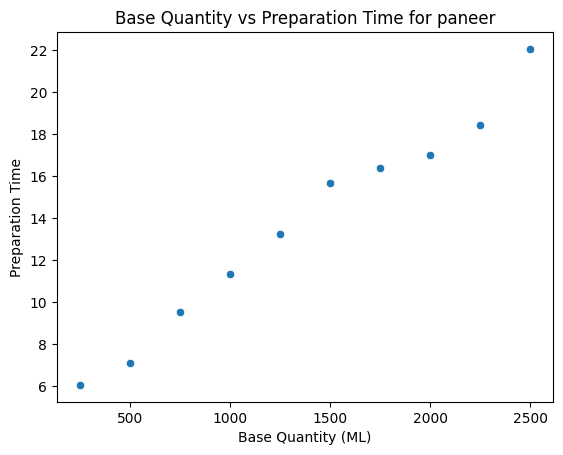

In [6]:
sns.scatterplot(x='Base Quantity (ML)', y='Preparation Time (min)', data=df_paneer)
plt.title('Base Quantity vs Preparation Time for paneer')
plt.xlabel('Base Quantity (ML)')
plt.ylabel('Preparation Time')
plt.show()

In [7]:
df_chicken.head()

,Base Quantity (ML),Chicken (g),Preparation Time (min),Cooking Time (min),Packaging Time (min)
0,250,105,9.651580,16.110116,1.931285
1,500,210,13.115789,21.659243,2.008583
2,750,310,13.144502,25.964397,2.528471
3,1000,400,18.195174,28.413812,3.135628
4,1250,510,17.056566,38.356558,2.369745


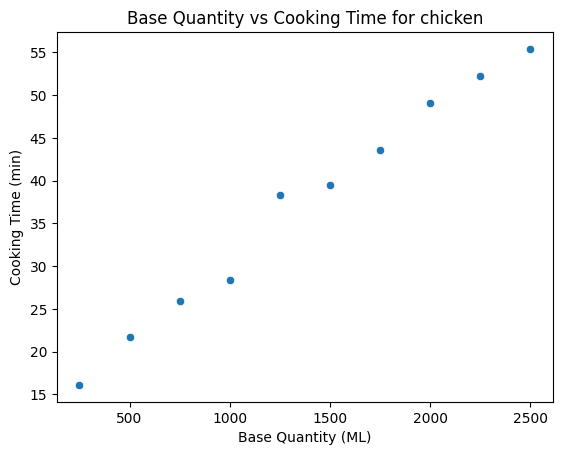

In [8]:

sns.scatterplot(x='Base Quantity (ML)', y='Cooking Time (min)', data=df_chicken)
plt.title('Base Quantity vs Cooking Time for chicken')
plt.xlabel('Base Quantity (ML)')
plt.ylabel('Cooking Time (min)')
plt.show()


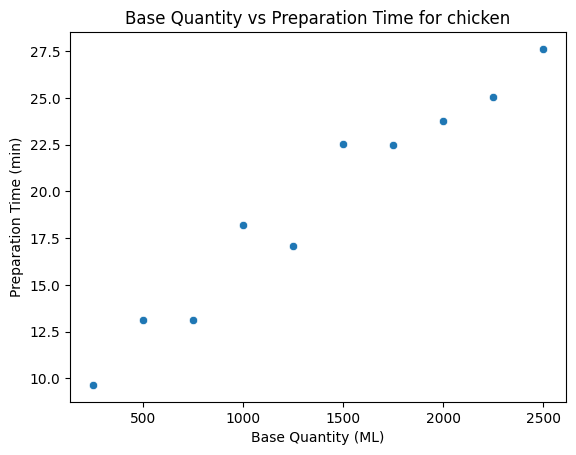

In [9]:
# Scatter plot for Base Quantity vs Preparation Time
sns.scatterplot(x='Base Quantity (ML)', y='Preparation Time (min)', data=df_chicken)
plt.title('Base Quantity vs Preparation Time for chicken')
plt.xlabel('Base Quantity (ML)')
plt.ylabel('Preparation Time (min)')
plt.show()


In [10]:
# Creating a new column 'Total Time (min)' in df_paneer
df_paneer['Total Cooking Time (min)'] = df_paneer['Preparation Time (min)'] + df_paneer['Cooking Time (min)'] + df_paneer['Packaging Time (min)']


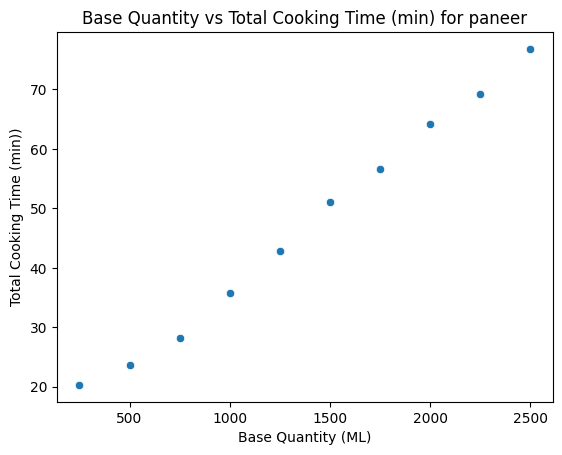

In [11]:
sns.scatterplot(x='Base Quantity (ML)', y='Total Cooking Time (min)', data=df_paneer)
plt.title('Base Quantity vs Total Cooking Time (min) for paneer')
plt.xlabel('Base Quantity (ML)')
plt.ylabel('Total Cooking Time (min))')
plt.show()

In [12]:
# Creating a new column 'Total Time (min)' in df_chicken
df_chicken['Total Cooking Time (min)'] = df_chicken['Preparation Time (min)'] + df_chicken['Cooking Time (min)'] + df_chicken['Packaging Time (min)']


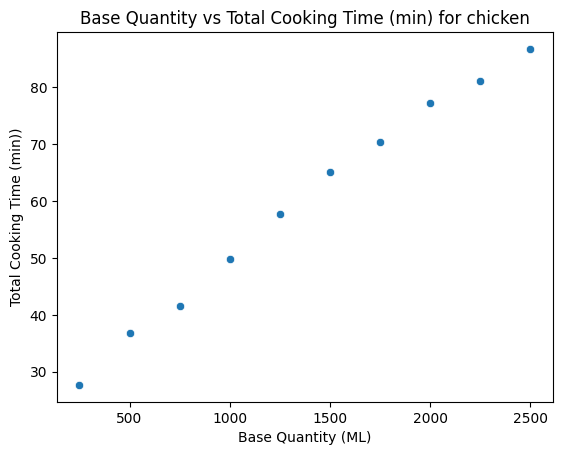

In [13]:
sns.scatterplot(x='Base Quantity (ML)', y='Total Cooking Time (min)', data=df_chicken)
plt.title('Base Quantity vs Total Cooking Time (min) for chicken')
plt.xlabel('Base Quantity (ML)')
plt.ylabel('Total Cooking Time (min))')
plt.show()

In [14]:
df_paneer


,Base Quantity (ML),Paneer (g),Preparation Time (min),Cooking Time (min),Packaging Time (min),Total Cooking Time (min)
0,250,85,6.070795,12.531170,1.709005,20.310970
1,500,175,7.111875,14.327085,2.232271,23.671231
2,750,265,9.566125,17.557647,1.145440,28.269212
3,1000,355,11.340495,22.302959,2.111552,35.755007
4,1250,450,13.252540,26.976013,2.527157,42.755710
5,1500,535,15.688988,32.398424,2.959621,51.047033
6,1750,620,16.380683,37.405161,2.906098,56.691942
7,2000,710,17.031647,42.954229,4.187609,64.173485
8,2250,790,18.431452,46.943309,3.884827,69.259587
9,2500,870,22.069357,50.659575,4.087758,76.816689


In [15]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# Calculate correlation coefficients for Paneer Butter Masala
pearson_corr_prep_paneer, _ = pearsonr(df_paneer["Base Quantity (ML)"], df_paneer["Preparation Time (min)"])
pearson_corr_cook_paneer, _ = pearsonr(df_paneer["Base Quantity (ML)"], df_paneer["Cooking Time (min)"])
pearson_corr_total_paneer, _ = pearsonr(df_paneer["Base Quantity (ML)"], df_paneer["Total Cooking Time (min)"])

spearman_corr_prep_paneer, _ = spearmanr(df_paneer["Base Quantity (ML)"], df_paneer["Preparation Time (min)"])
spearman_corr_cook_paneer, _ = spearmanr(df_paneer["Base Quantity (ML)"], df_paneer["Cooking Time (min)"])
spearman_corr_total_paneer, _ = spearmanr(df_paneer["Base Quantity (ML)"], df_paneer["Total Cooking Time (min)"])

kendall_corr_prep_paneer, _ = kendalltau(df_paneer["Base Quantity (ML)"], df_paneer["Preparation Time (min)"])
kendall_corr_cook_paneer, _ = kendalltau(df_paneer["Base Quantity (ML)"], df_paneer["Cooking Time (min)"])
kendall_corr_total_paneer, _ = kendalltau(df_paneer["Base Quantity (ML)"], df_paneer["Total Cooking Time (min)"])

# Calculate correlation coefficients for Chicken Curry
pearson_corr_prep_chicken, _ = pearsonr(df_chicken["Base Quantity (ML)"], df_chicken["Preparation Time (min)"])
pearson_corr_cook_chicken, _ = pearsonr(df_chicken["Base Quantity (ML)"], df_chicken["Cooking Time (min)"])
pearson_corr_total_chicken, _ = pearsonr(df_chicken["Base Quantity (ML)"], df_chicken["Total Cooking Time (min)"])

spearman_corr_prep_chicken, _ = spearmanr(df_chicken["Base Quantity (ML)"], df_chicken["Preparation Time (min)"])
spearman_corr_cook_chicken, _ = spearmanr(df_chicken["Base Quantity (ML)"], df_chicken["Cooking Time (min)"])
spearman_corr_total_chicken, _ = spearmanr(df_chicken["Base Quantity (ML)"], df_chicken["Total Cooking Time (min)"])

kendall_corr_prep_chicken, _ = kendalltau(df_chicken["Base Quantity (ML)"], df_chicken["Preparation Time (min)"])
kendall_corr_cook_chicken, _ = kendalltau(df_chicken["Base Quantity (ML)"], df_chicken["Cooking Time (min)"])
kendall_corr_total_chicken, _ = kendalltau(df_chicken["Base Quantity (ML)"], df_chicken["Total Cooking Time (min)"])

# Print results
print("Paneer Butter Masala Correlations:")
print(f"Pearson Correlation (Base Quantity vs Preparation Time): {pearson_corr_prep_paneer}")
print(f"Pearson Correlation (Base Quantity vs Cooking Time): {pearson_corr_cook_paneer}")
print(f"Pearson Correlation (Base Quantity vs Total Cooking Time (min)): {pearson_corr_total_paneer}")
print(f"Spearman Correlation (Base Quantity vs Preparation Time): {spearman_corr_prep_paneer}")
print(f"Spearman Correlation (Base Quantity vs Cooking Time): {spearman_corr_cook_paneer}")
print(f"Spearman Correlation (Base Quantity vs Total Cooking Time (min)): {spearman_corr_total_paneer}")
print(f"Kendall Correlation (Base Quantity vs Preparation Time): {kendall_corr_prep_paneer}")
print(f"Kendall Correlation (Base Quantity vs Cooking Time): {kendall_corr_cook_paneer}")
print(f"Kendall Correlation (Base Quantity vs Total Cooking Time (min)): {kendall_corr_total_paneer}\n")

print("Chicken Curry Correlations:")
print(f"Pearson Correlation (Base Quantity vs Preparation Time): {pearson_corr_prep_chicken}")
print(f"Pearson Correlation (Base Quantity vs Cooking Time): {pearson_corr_cook_chicken}")
print(f"Pearson Correlation (Base Quantity vs Total Cooking Time (min)): {pearson_corr_total_chicken}")
print(f"Spearman Correlation (Base Quantity vs Preparation Time): {spearman_corr_prep_chicken}")
print(f"Spearman Correlation (Base Quantity vs Cooking Time): {spearman_corr_cook_chicken}")
print(f"Spearman Correlation (Base Quantity vs Total Cooking Time (min)): {spearman_corr_total_chicken}")
print(f"Kendall Correlation (Base Quantity vs Preparation Time): {kendall_corr_prep_chicken}")
print(f"Kendall Correlation (Base Quantity vs Cooking Time): {kendall_corr_cook_chicken}")
print(f"Kendall Correlation (Base Quantity vs Total Cooking Time (min)): {kendall_corr_total_chicken}")


Paneer Butter Masala Correlations:
Pearson Correlation (Base Quantity vs Preparation Time): 0.9899936262153345
Pearson Correlation (Base Quantity vs Cooking Time): 0.9959601552453238
Pearson Correlation (Base Quantity vs Total Cooking Time (min)): 0.9974459731593008
Spearman Correlation (Base Quantity vs Preparation Time): 0.9999999999999999
Spearman Correlation (Base Quantity vs Cooking Time): 0.9999999999999999
Spearman Correlation (Base Quantity vs Total Cooking Time (min)): 0.9999999999999999
Kendall Correlation (Base Quantity vs Preparation Time): 0.9999999999999999
Kendall Correlation (Base Quantity vs Cooking Time): 0.9999999999999999
Kendall Correlation (Base Quantity vs Total Cooking Time (min)): 0.9999999999999999

Chicken Curry Correlations:
Pearson Correlation (Base Quantity vs Preparation Time): 0.9771345089283583
Pearson Correlation (Base Quantity vs Cooking Time): 0.9936133250930476
Pearson Correlation (Base Quantity vs Total Cooking Time (min)): 0.99646047448232
Spearma

In [16]:

X_pan = df_paneer[['Base Quantity (ML)']]  # Feature
y_pan = df_paneer['Total Cooking Time (min)']  # Target (change to 'Preparation Time (min)' or 'Cooking Time (min)' if needed)

# Split the data into training and test sets
X_pan_train, X_pan_test, y_pan_train, y_pan_test = train_test_split(X_pan, y_pan, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_pan_train_scaled = scaler.fit_transform(X_pan_train)
X_pan_test_scaled = scaler.transform(X_pan_test)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model with the necessary parameters for GPU usage
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', device='cuda')

# Perform RandomizedSearchCV to find the best hyperparameters
grid_search = RandomizedSearchCV(estimator=xgboost_model, param_distributions=param_grid, 
                                 scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=1, random_state=42)
grid_search.fit(X_pan_train_scaled, y_pan_train)

# Best parameters found by RandomizedSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Remove 'tree_method' and 'device' from best_params to avoid duplicates
best_params = {key: value for key, value in best_params.items() if key not in ['tree_method', 'device']}

# Train the XGBoost model with the best parameters using early stopping
best_paneer_model = xgb.XGBRegressor(**best_params, 
                              objective='reg:squarederror', 
                              tree_method='hist', 
                              device='cuda', 
                              early_stopping_rounds=10)

# Fit the model with early stopping
best_paneer_model.fit(X_pan_train_scaled, y_pan_train, 
               eval_set=[(X_pan_test_scaled, y_pan_test)], 
               verbose=False)

# Predicting on the test set
y_pan_pred = best_paneer_model.predict(X_pan_test_scaled)

# Model evaluation
mse = mean_squared_error(y_pan_test, y_pan_pred)
r2 = r2_score(y_pan_test, y_pan_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Displaying predictions vs actual values
comparison = pd.DataFrame({'Actual': y_pan_test, 'Predicted': y_pan_pred})
print(comparison.head())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:31:02] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Mean Squared Error: 29.80228830371438
R^2 Score: 0.9151047489726785
      Actual  Predicted
8  69.259587  64.704834
1  23.671231  23.560534
5  51.047033  42.761574


In [17]:
# # Feature and target selection
# X = df_paneer[['Base Quantity (ML)']]  # Feature
# y = df_paneer['Total Time (min)']  # Target (change to 'Preparation Time (min)' or 'Cooking Time (min)' if needed)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Adjustments for GPU usage in Kaggle
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [1, 1.5, 2],
#     'tree_method': ['hist'],  # Use histogram-based method
#     'device': ['cuda'],  # Use GPU for training
# }

# xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', device='cuda')

# grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
# grid_search.fit(X_train_scaled, y_train)

# # Best parameters found by GridSearchCV
# best_params = grid_search.best_params_
# print(f"Best Parameters: {best_params}")

# # Train the XGBoost model with the best parameters on GPU
# best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', tree_method='hist', device='cuda')
# best_model.fit(X_train_scaled, y_train)

# # Predicting on the test set
# y_pred = best_model.predict(X_test_scaled)

# # Model evaluation
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")

# # Displaying predictions vs actual values
# comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(comparison.head())

In [18]:
random_pan_index = np.random.randint(0, len(X_pan_test_scaled))

# Get the feature and actual value from the test dataset
test_pan_example = X_pan_test_scaled[random_pan_index].reshape(1, -1)
actual_pan_value = y_pan_test.iloc[random_pan_index]

# Predict the value using the trained model
predicted_pan_value = best_paneer_model.predict(test_pan_example)

# Display the actual and predicted values
print(f"Test Example Feature (Base Quantity): {X_pan_test.iloc[random_pan_index].values}")
print(f"Actual Total Time (min): {actual_pan_value}")
print(f"Predicted Total Time (min): {predicted_pan_value[0]}")

Test Example Feature (Base Quantity): [1500]
Actual Total Time (min): 51.04703291090986
Predicted Total Time (min): 42.761573791503906


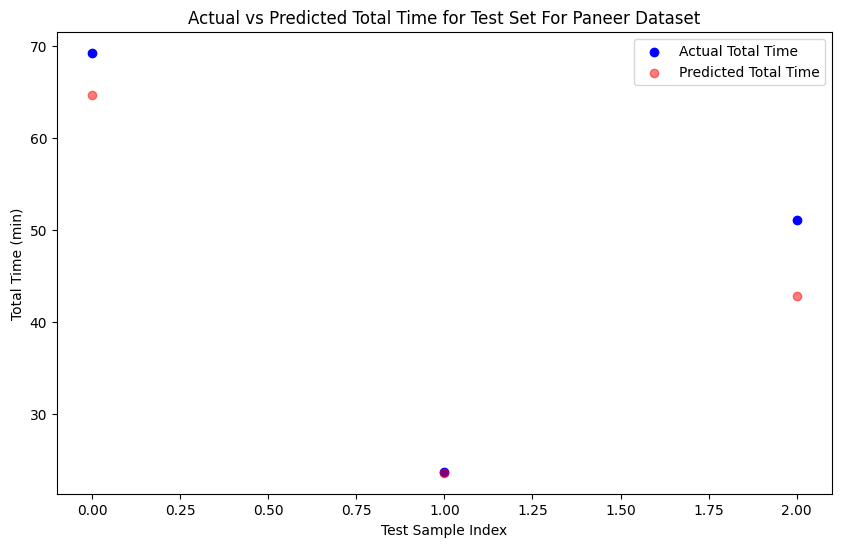

In [19]:
y_pan_pred = best_paneer_model.predict(X_pan_test_scaled)

# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pan_test)), y_pan_test, color='blue', label='Actual Total Time')
plt.scatter(range(len(y_pan_test)), y_pan_pred, color='red', alpha=0.5, label='Predicted Total Time')

# Adding labels and title
plt.xlabel('Test Sample Index')
plt.ylabel('Total Time (min)')
plt.title('Actual vs Predicted Total Time for Test Set For Paneer Dataset')
plt.legend()
plt.show()

# Same for non veg 

In [20]:
# df_chicken = pd.read_csv('/kaggle/working/df_chicken_results.csv')  

# Feature and target selection
X_chicken = df_chicken[['Base Quantity (ML)']]  # Feature
y_chicken = df_chicken['Total Cooking Time (min)']  #Target

# Split the data into training and test sets
X_train_chicken, X_test_chicken, y_train_chicken, y_test_chicken = train_test_split(X_chicken, y_chicken, test_size=0.2, random_state=42)

# Feature scaling
scaler_chicken = StandardScaler()
X_train_chicken_scaled = scaler_chicken.fit_transform(X_train_chicken)
X_test_chicken_scaled = scaler_chicken.transform(X_test_chicken)

# Define the parameter grid for RandomizedSearchCV
param_grid_chicken = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model with the necessary parameters for GPU usage
xgboost_model_chicken = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', device='cuda')

# Perform RandomizedSearchCV to find the best hyperparameters
grid_search_chicken = RandomizedSearchCV(estimator=xgboost_model_chicken, param_distributions=param_grid_chicken, 
                                         scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=1, random_state=42)
grid_search_chicken.fit(X_train_chicken_scaled, y_train_chicken)

# Best parameters found by RandomizedSearchCV
best_params_chicken = grid_search_chicken.best_params_
print(f"Best Parameters for Chicken Dataset: {best_params_chicken}")

# Remove 'tree_method' and 'device' from best_params to avoid duplicates
best_params_chicken = {key: value for key, value in best_params_chicken.items() if key not in ['tree_method', 'device']}

# Train the XGBoost model with the best parameters using early stopping
best_model_chicken = xgb.XGBRegressor(**best_params_chicken, 
                                      objective='reg:squarederror', 
                                      tree_method='hist', 
                                      device='cuda', 
                                      early_stopping_rounds=10)

# Fit the model with early stopping
best_model_chicken.fit(X_train_chicken_scaled, y_train_chicken, 
                       eval_set=[(X_test_chicken_scaled, y_test_chicken)], 
                       verbose=False)

# Predicting on the test set
y_pred_chicken = best_model_chicken.predict(X_test_chicken_scaled)

# Model evaluation
mse_chicken = mean_squared_error(y_test_chicken, y_pred_chicken)
r2_chicken = r2_score(y_test_chicken, y_pred_chicken)
print(f"Mean Squared Error (Chicken): {mse_chicken}")
print(f"R^2 Score (Chicken): {r2_chicken}")

# Displaying predictions vs actual values
comparison_chicken = pd.DataFrame({'Actual': y_test_chicken, 'Predicted': y_pred_chicken})
print(comparison_chicken.head())

# Save df_chicken to Kaggle's database (as CSV)
df_chicken.to_csv('/kaggle/working/df_chicken_results.csv', index=False)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Chicken Dataset: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}
Mean Squared Error (Chicken): 6.9547722554885105
R^2 Score (Chicken): 0.9857877567040021
      Actual  Predicted
8  81.026164  77.297256
1  36.783616  36.714394


In [21]:
random_index_chicken = np.random.randint(0, len(X_test_chicken_scaled))

# Get the feature and actual value from the test dataset
test_example_chicken = X_test_chicken_scaled[random_index_chicken].reshape(1, -1)
actual_value_chicken = y_test_chicken.iloc[random_index_chicken]

# Predict the value using the trained model
predicted_value_chicken = best_model_chicken.predict(test_example_chicken)

# Display the actual and predicted values
print(f"Test Example Feature (Base Quantity): {X_test_chicken.iloc[random_index_chicken].values}")
print(f"Actual Total Time (min): {actual_value_chicken}")
print(f"Predicted Total Time (min): {predicted_value_chicken[0]}")

Test Example Feature (Base Quantity): [2250]
Actual Total Time (min): 81.02616419336695
Predicted Total Time (min): 77.29725646972656


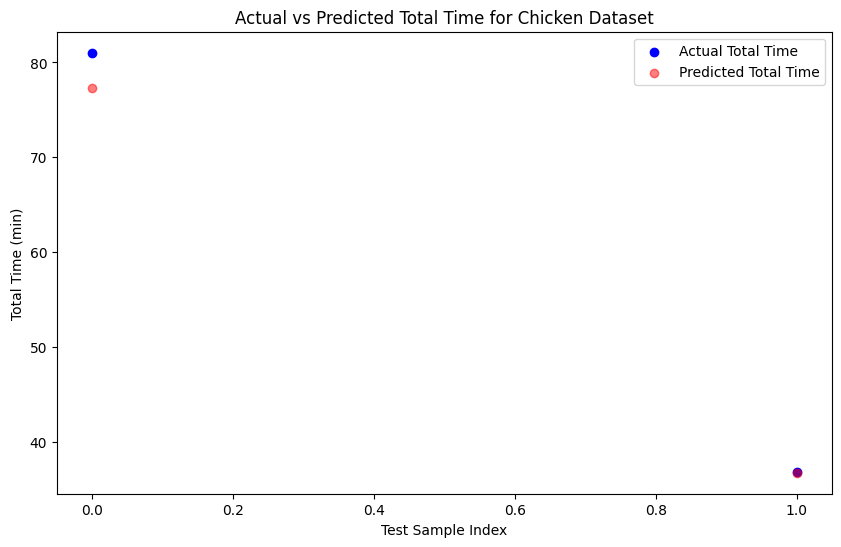

In [22]:
y_chicken_pred = best_model_chicken.predict(X_test_chicken_scaled)

# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_chicken)), y_test_chicken, color='blue', label='Actual Total Time')
plt.scatter(range(len(y_test_chicken)), y_chicken_pred, color='red', alpha=0.5, label='Predicted Total Time')

# Adding labels and title
plt.xlabel('Test Sample Index')
plt.ylabel('Total Time (min)')
plt.title('Actual vs Predicted Total Time for Chicken Dataset')
plt.legend()
plt.show()

# Synchronous and Asynchronous Order Passing Pipeline


In [23]:
# # Simulate serving sizes for orders
# np.random.seed(42)

# # Parameters
# peak_hours_orders_per_min = 15  # Average orders per minute during peak hours
# non_peak_orders_per_min = 5     # Average orders per minute during non-peak hours
# simulation_time = 60            # Simulate for 60 minutes

# # Kitchen Capacity (Maximum orders the kitchen can handle at once)
# kitchen_capacity = 20

# # Time window for synchronous approach
# time_window = 5  # in minutes

# # Simulate order arrivals (Poisson process for order arrivals)
# def simulate_orders(arrival_rate, time):
#     return np.random.poisson(arrival_rate, time)

# # Predict the total cooking time using the pre-trained model
# def predict_cooking_time(serving_size):
#     return best_paneer_model.predict([[serving_size]])

# # Decide between synchronous and asynchronous based on total cooking time
# def decide_approach(cooking_time, time_threshold):
#     if cooking_time <= time_threshold:
#         return "Synchronous"
#     else:
#         return "Asynchronous"

# # Simulate Synchronous Approach
# def synchronous_approach(orders, kitchen_capacity, time_window):
#     order_batches = []
#     for i in range(0, len(orders), time_window):
#         batch = orders[i:i + time_window].sum()
#         order_batches.append(min(batch, kitchen_capacity))
#     return np.array(order_batches)

# # Simulate Asynchronous Approach
# def asynchronous_approach(orders, kitchen_capacity):
#     processed_orders = []
#     batch = 0
#     for order in orders:
#         batch += order
#         if batch >= kitchen_capacity:
#             processed_orders.append(kitchen_capacity)
#             batch = 0
#         else:
#             processed_orders.append(0)
#     return np.array(processed_orders)

# # Generate orders for peak and non-peak hours
# peak_orders = simulate_orders(peak_hours_orders_per_min, simulation_time)
# non_peak_orders = simulate_orders(non_peak_orders_per_min, simulation_time)

# # Simulate serving sizes for orders (assuming different sizes: 250ML, 500ML, 1000ML)
# serving_sizes = np.random.choice([250, 500, 1000], size=len(peak_orders))

# # Simulate cooking times based on serving sizes
# cooking_times = np.array([predict_cooking_time(size)[0] for size in serving_sizes])

# # Decision-making between synchronous and asynchronous based on predicted cooking times
# time_threshold = 31  # Arbitrary threshold in minutes for deciding between synchronous and asynchronous

# approaches_peak = [decide_approach(cooking_time, time_threshold) for cooking_time in cooking_times]
# approaches_non_peak = approaches_peak[:len(non_peak_orders)]  # Same distribution for non-peak

# # Process orders using the chosen approach
# sync_peak = synchronous_approach(peak_orders, kitchen_capacity, time_window)
# async_peak = asynchronous_approach(peak_orders, kitchen_capacity)

# sync_non_peak = synchronous_approach(non_peak_orders, kitchen_capacity, time_window)
# async_non_peak = asynchronous_approach(non_peak_orders, kitchen_capacity)

# # Analyze the results
# def analyze_results(orders, processed_orders, approach_name):
#     total_orders = orders.sum()
#     total_processed = processed_orders.sum()
#     orders_missed = total_orders - total_processed
    
#     print(f"{approach_name} - Total Orders: {total_orders}, Total Processed: {total_processed}, Orders Missed: {orders_missed}")
#     return orders_missed

# print("Peak Hours Analysis:")
# missed_sync_peak = analyze_results(peak_orders, sync_peak, "Synchronous Approach")
# missed_async_peak = analyze_results(peak_orders, async_peak, "Asynchronous Approach")

# print("\nNon-Peak Hours Analysis:")
# missed_sync_non_peak = analyze_results(non_peak_orders, sync_non_peak, "Synchronous Approach")
# missed_async_non_peak = analyze_results(non_peak_orders, async_non_peak, "Asynchronous Approach")

# # Plot results for visualization
# def plot_orders(orders, processed_sync, processed_async, title):
#     plt.figure(figsize=(12, 6))
#     plt.plot(orders, label="Incoming Orders", linestyle="--")
#     plt.plot(processed_sync, label="Synchronous Processed Orders")
#     plt.plot(processed_async, label="Asynchronous Processed Orders")
#     plt.title(title)
#     plt.xlabel("Time (minutes)")
#     plt.ylabel("Orders")
#     plt.legend()
#     plt.show()

# plot_orders(peak_orders, sync_peak, async_peak, "Peak Hours - Order Processing Comparison")
# plot_orders(non_peak_orders, sync_non_peak, async_non_peak, "Non-Peak Hours - Order Processing Comparison")

# # Additional output: Determine which approach is chosen more frequently based on cooking time
# sync_count_peak = approaches_peak.count("Synchronous")
# async_count_peak = approaches_peak.count("Asynchronous")

# sync_count_non_peak = approaches_non_peak.count("Synchronous")
# async_count_non_peak = approaches_non_peak.count("Asynchronous")

# print(f"Peak Hours: Synchronous Approach Chosen {sync_count_peak} times, Asynchronous Approach Chosen {async_count_peak} times")
# print(f"Non-Peak Hours: Synchronous Approach Chosen {sync_count_non_peak} times, Asynchronous Approach Chosen {async_count_non_peak} times")

Peak Hours Analysis:
Synchronous Approach - Total Orders: 2282, Total Processed: 480, Orders Missed: 1802
Asynchronous Approach - Total Orders: 2282, Total Processed: 520, Orders Missed: 944

Non-Peak Hours Analysis:
Synchronous Approach - Total Orders: 649, Total Processed: 447, Orders Missed: 202
Asynchronous Approach - Total Orders: 649, Total Processed: 160, Orders Missed: 136


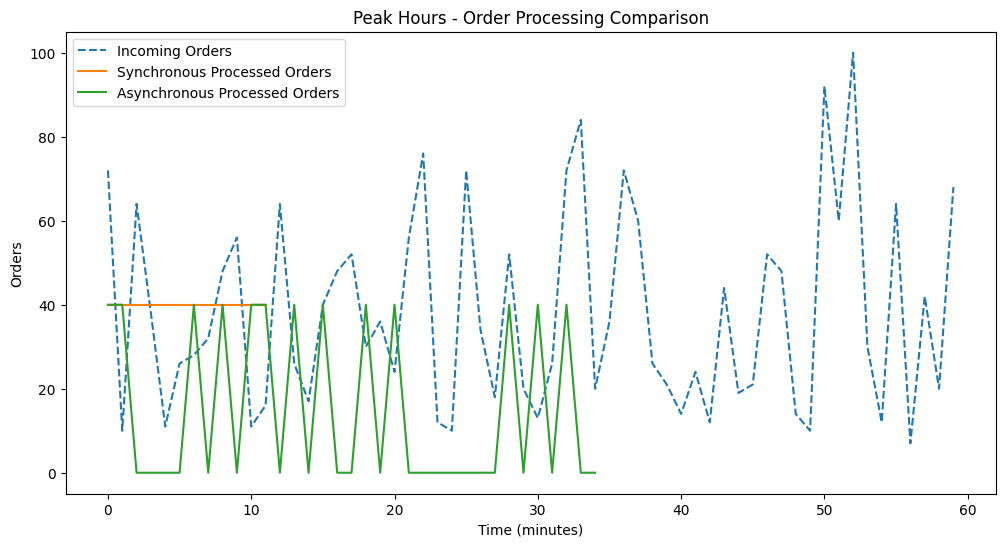

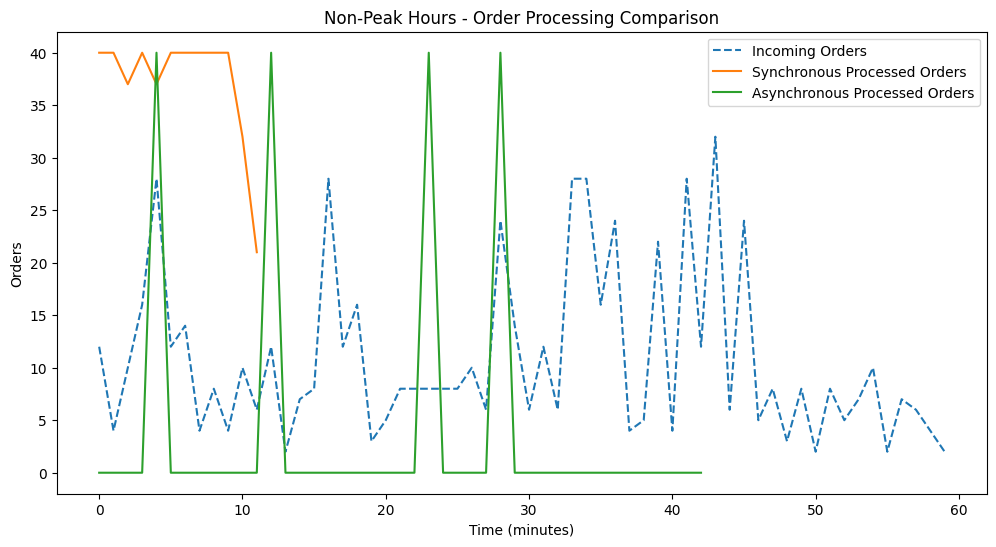

In [24]:
# Set seed for reproducibility
np.random.seed(42)

# Parameters
peak_hours_orders_per_min = 15 # Average orders per minute during peak hours
non_peak_orders_per_min = 5     # Average orders per minute during non-peak hours
simulation_time = 60            # Simulate for 60 minutes

# Kitchen Capacity (Maximum orders the kitchen can handle at once)
kitchen_capacity = 40

# Time window for synchronous approach
time_window = 5  # in minutes

# Define order quantities in ml
order_quantities = [250, 500, 1000]  # in ml

# Function to generate random order quantities
def generate_order_quantities(order_count):
    return np.random.choice(order_quantities, order_count)

# Simulate order arrivals with actual serving sizes
def simulate_orders(arrival_rate, time):
    orders = np.random.poisson(arrival_rate, time)
    order_sizes = generate_order_quantities(len(orders))
    return orders, order_sizes

# Convert larger orders into multiple base orders
def convert_to_base_orders(order_sizes):
    base_orders = []
    for size in order_sizes:
        base_orders.append(size // 250)  # Convert to base quantity (250 ml)
    return np.array(base_orders)

# Predict cooking time using the trained best_paneer_model
def predict_cooking_time(order_sizes, model, scaler):
    # Convert the order sizes into a DataFrame with the appropriate feature name
    order_sizes_df = pd.DataFrame(order_sizes, columns=['Base Quantity (ML)'])
    scaled_sizes = scaler.transform(order_sizes_df)  # Apply scaling
    return model.predict(scaled_sizes)

# Simulate Synchronous Approach
def synchronous_approach(orders, kitchen_capacity, time_window, cooking_times):
    processed_orders = []
    orders_missed = 0
    
    for i in range(0, len(orders), time_window):
        batch_orders = orders[i:i + time_window].sum()
        
        if batch_orders <= kitchen_capacity:
            processed_orders.append(batch_orders)
        else:
            # Process up to the kitchen's capacity
            processed_orders.append(kitchen_capacity)
            # Count the remaining orders as missed
            orders_missed += (batch_orders - kitchen_capacity)
    
    return np.array(processed_orders), orders_missed

# Simulate Asynchronous Approach with large order prioritization
def asynchronous_approach(orders, cooking_times, kitchen_capacity):
    processed_orders = []
    orders_missed = 0
    batch = 0
    for i in range(len(orders)):
        if cooking_times[i] >= 28:  # Prioritize large orders (cooking time > 28 mins)
            batch += orders[i]
        else:
            if batch >= kitchen_capacity:
                processed_orders.append(kitchen_capacity)
                orders_missed += (batch - kitchen_capacity)
                batch = 0
            else:
                processed_orders.append(0)
    
    return np.array(processed_orders), orders_missed

# Generate orders for peak and non-peak hours
peak_orders, peak_order_sizes = simulate_orders(peak_hours_orders_per_min, simulation_time)
non_peak_orders, non_peak_order_sizes = simulate_orders(non_peak_orders_per_min, simulation_time)

# Convert to base orders
peak_base_orders = convert_to_base_orders(peak_order_sizes)*peak_orders
non_peak_base_orders = convert_to_base_orders(non_peak_order_sizes)*non_peak_orders

# Predict cooking times using best_paneer_model
peak_cooking_times = predict_cooking_time(peak_order_sizes, best_paneer_model, scaler)
non_peak_cooking_times = predict_cooking_time(non_peak_order_sizes, best_paneer_model, scaler)

# Process orders using both approaches
sync_peak, missed_sync_peak = synchronous_approach(peak_base_orders, kitchen_capacity, time_window, peak_cooking_times)
sync_non_peak, missed_sync_non_peak = synchronous_approach(non_peak_base_orders, kitchen_capacity, time_window, non_peak_cooking_times)

async_peak, missed_async_peak = asynchronous_approach(peak_base_orders, peak_cooking_times, kitchen_capacity)
async_non_peak, missed_async_non_peak = asynchronous_approach(non_peak_base_orders, non_peak_cooking_times, kitchen_capacity)

# Analyze the results
def analyze_results(orders, processed_orders, missed_orders, approach_name):
    total_orders = orders.sum()
    total_processed = processed_orders.sum()
    
    print(f"{approach_name} - Total Orders: {total_orders}, Total Processed: {total_processed}, Orders Missed: {missed_orders}")
    return missed_orders

print("Peak Hours Analysis:")
analyze_results(peak_base_orders, sync_peak, missed_sync_peak, "Synchronous Approach")
analyze_results(peak_base_orders, async_peak, missed_async_peak, "Asynchronous Approach")

print("\nNon-Peak Hours Analysis:")
analyze_results(non_peak_base_orders, sync_non_peak, missed_sync_non_peak, "Synchronous Approach")
analyze_results(non_peak_base_orders, async_non_peak, missed_async_non_peak, "Asynchronous Approach")

# Plot results for visualization
def plot_orders(orders, processed_sync, processed_async, title):
    plt.figure(figsize=(12, 6))
    plt.plot(orders, label="Incoming Orders", linestyle="--")
    plt.plot(processed_sync, label="Synchronous Processed Orders")
    plt.plot(processed_async, label="Asynchronous Processed Orders")
    plt.title(title)
    plt.xlabel("Time (minutes)")
    plt.ylabel("Orders")
    plt.legend()
    plt.show()

plot_orders(peak_base_orders, sync_peak, async_peak, "Peak Hours - Order Processing Comparison")
plot_orders(non_peak_base_orders, sync_non_peak, async_non_peak, "Non-Peak Hours - Order Processing Comparison")


In [25]:
# # Set seed for reproducibility
# np.random.seed(42)

# # Parameters
# peak_hours_orders_per_min = 15  # Average orders per minute during peak hours
# non_peak_orders_per_min = 5     # Average orders per minute during non-peak hours
# simulation_time = 60            # Simulate for 60 minutes

# # Kitchen Capacity (Maximum orders the kitchen can handle at once)
# kitchen_capacity = 30

# # Time window for synchronous approach
# time_window = 5  # in minutes

# # Define order quantities in ml
# order_quantities = [250, 500, 750, 1000]  # in ml

# # Function to generate random order quantities
# def generate_order_quantities(order_count):
#     return np.random.choice(order_quantities, order_count)

# # Simulate order arrivals with actual serving sizes
# def simulate_orders(arrival_rate, time):
#     orders = np.random.poisson(arrival_rate, time)
#     order_sizes = generate_order_quantities(len(orders))
#     return orders, order_sizes

# # Convert larger orders into multiple base orders
# def convert_to_base_orders(order_sizes):
#     base_orders = []
#     for size in order_sizes:
#         base_orders.append(size // 250)  # Convert to base quantity (250 ml)
#     return np.array(base_orders)

# # Predict cooking time using the trained best_paneer_model
# def predict_cooking_time(order_sizes, model, scaler):
#     # Convert the order sizes into a DataFrame with the appropriate feature name
#     order_sizes_df = pd.DataFrame(order_sizes, columns=['Base Quantity (ML)'])
#     scaled_sizes = scaler.transform(order_sizes_df)  # Apply scaling
#     return model.predict(scaled_sizes)

# # Simulate Synchronous Approach
# def synchronous_approach(orders, kitchen_capacity, time_window):
#     order_batches = []
#     for i in range(0, len(orders), time_window):
#         batch = orders[i:i + time_window].sum()
#         order_batches.append(min(batch, kitchen_capacity))
#     return np.array(order_batches)

# # Simulate Asynchronous Approach with large order prioritization
# def asynchronous_approach(orders, cooking_times, kitchen_capacity):
#     processed_orders = []
#     batch = 0
#     for i in range(len(orders)):
#         if cooking_times[i] >= 28:  # Prioritize large orders (cooking time > 31 mins)
#             batch += orders[i]
#         else:
#             if batch >= kitchen_capacity:
#                 processed_orders.append(kitchen_capacity)
#                 batch = 0
#             else:
#                 processed_orders.append(0)
#     return np.array(processed_orders)

# # Generate orders for peak and non-peak hours
# peak_orders, peak_order_sizes = simulate_orders(peak_hours_orders_per_min, simulation_time)
# non_peak_orders, non_peak_order_sizes = simulate_orders(non_peak_orders_per_min, simulation_time)

# # Convert to base orders
# peak_base_orders = convert_to_base_orders(peak_order_sizes)*peak_orders
# non_peak_base_orders = convert_to_base_orders(non_peak_order_sizes)*non_peak_orders

# # Predict cooking times using best_paneer_model
# peak_cooking_times = predict_cooking_time(peak_order_sizes, best_paneer_model, scaler)
# non_peak_cooking_times = predict_cooking_time(non_peak_order_sizes, best_paneer_model, scaler)

# # Process orders using both approaches
# sync_peak = synchronous_approach(peak_base_orders, kitchen_capacity, time_window)
# sync_non_peak = synchronous_approach(non_peak_base_orders, kitchen_capacity, time_window)

# async_peak = asynchronous_approach(peak_base_orders, peak_cooking_times, kitchen_capacity)
# async_non_peak = asynchronous_approach(non_peak_base_orders, non_peak_cooking_times, kitchen_capacity)

# # Analyze the results
# def analyze_results(orders, processed_orders, approach_name):
#     total_orders = orders.sum()
#     total_processed = processed_orders.sum()
#     orders_missed = total_orders - total_processed
    
#     print(f"{approach_name} - Total Orders: {total_orders}, Total Processed: {total_processed}, Orders Missed: {orders_missed}")
#     return orders_missed

# print("Peak Hours Analysis:")
# missed_sync_peak = analyze_results(peak_base_orders, sync_peak, "Synchronous Approach")
# missed_async_peak = analyze_results(peak_base_orders, async_peak, "Asynchronous Approach")

# print("\nNon-Peak Hours Analysis:")
# missed_sync_non_peak = analyze_results(non_peak_base_orders, sync_non_peak, "Synchronous Approach")
# missed_async_non_peak = analyze_results(non_peak_base_orders, async_non_peak, "Asynchronous Approach")
# print(f"\nPredictions time avg : {sum(peak_cooking_times)//(len(peak_cooking_times))}")
# print(f"\peak_base_orders : {peak_base_orders}")
# # Plot results for visualization
# def plot_orders(orders, processed_sync, processed_async, title):
#     plt.figure(figsize=(12, 6))
#     plt.plot(orders, label="Incoming Orders", linestyle="--")
#     plt.plot(processed_sync, label="Synchronous Processed Orders")
#     plt.plot(processed_async, label="Asynchronous Processed Orders")
#     plt.title(title)
#     plt.xlabel("Time (minutes)")
#     plt.ylabel("Orders")
#     plt.legend()
#     plt.show()

# plot_orders(peak_base_orders, sync_peak, async_peak, "Peak Hours - Order Processing Comparison")
# plot_orders(non_peak_base_orders, sync_non_peak, async_non_peak, "Non-Peak Hours - Order Processing Comparison")


# Delivery Rider Availibility Estimation 

In [26]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import xgboost as xgb

# # Assuming cooking time prediction and model setup from Case 1 is available as best_paneer_model and scaler

# # Sample synthetic data generation
# np.random.seed(42)
# num_samples = 1000

# # Relevant Features
# order_volume = np.random.choice([250, 500, 1000], num_samples)  # in ml
# peak_hour = np.random.choice([0, 1], num_samples)  # 0 for non-peak, 1 for peak hours
# traffic_condition = np.random.choice([0, 1], num_samples)  # 0 for low, 1 for high traffic
# weather_condition = np.random.choice([0, 1], num_samples)  # 0 for normal, 1 for adverse weather
# average_orders_per_rider_per_hour = np.random.normal(5, 1, num_samples)  # Assuming average orders per hour per rider
# order_passing_approach = np.random.choice([0, 1], num_samples)  # 0 for synchronous, 1 for asynchronous

# # Predict cooking time using the model from Case 1
# cooking_time_df = pd.DataFrame(order_volume, columns=['Base Quantity (ML)'])
# cooking_time_scaled = scaler.transform(cooking_time_df)
# predicted_cooking_time = best_paneer_model.predict(cooking_time_scaled)

# # Synthetic target variable: Number of riders needed
# # Assume a basic formula: Riders needed = (Order Volume * Peak Hour Factor + Traffic Factor + Weather Factor + Cooking Time Factor) / Orders per Rider per Hour
# riders_needed = (order_volume * (1 + peak_hour + traffic_condition + weather_condition + predicted_cooking_time)) / average_orders_per_rider_per_hour

# # Creating DataFrame for the model
# df_riders = pd.DataFrame({
#     'Order Volume': order_volume,
#     'Peak Hour': peak_hour,
#     'Traffic Condition': traffic_condition,
#     'Weather Condition': weather_condition,
#     'Average Orders per Rider per Hour': average_orders_per_rider_per_hour,
#     'Order Passing Approach': order_passing_approach,
#     'Predicted Cooking Time': predicted_cooking_time,
#     'Riders Needed': riders_needed
# })

# # Splitting the data into training and testing sets
# X = df_riders[['Order Volume', 'Peak Hour', 'Traffic Condition', 'Weather Condition', 
#                'Average Orders per Rider per Hour', 'Order Passing Approach', 'Predicted Cooking Time']]
# y = df_riders['Riders Needed']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Scaling the features
# scaler_riders = StandardScaler()
# X_train_scaled = scaler_riders.fit_transform(X_train)
# X_test_scaled = scaler_riders.transform(X_test)

# # Initialize a model (RandomForestRegressor for this example)
# rider_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rider_model.fit(X_train_scaled, y_train)

# # Predicting on the test set
# y_pred_riders = rider_model.predict(X_test_scaled)

# # Model evaluation
# mse_riders = mean_squared_error(y_test, y_pred_riders)
# r2_riders = r2_score(y_test, y_pred_riders)

# print(f"Mean Squared Error (Riders): {mse_riders}")
# print(f"R^2 Score (Riders): {r2_riders}")

# # Displaying predictions vs actual values for a few samples
# comparison_riders = pd.DataFrame({'Actual Riders Needed': y_test, 'Predicted Riders Needed': y_pred_riders})
# print(comparison_riders.head())


In [27]:
# Assuming cooking time prediction and model setup from Case 1 is available as best_paneer_model and scaler

# Sample synthetic data generation
np.random.seed(42)
num_samples = 1000

# Relevant Features
order_volume = np.random.choice([250, 500, 1000], num_samples)  # in ml
peak_hour = np.random.choice([0, 1], num_samples)  # 0 for non-peak, 1 for peak hours
traffic_condition = np.random.choice([0, 1], num_samples)  # 0 for low, 1 for high traffic
weather_condition = np.random.choice([0, 1], num_samples)  # 0 for normal, 1 for adverse weather
average_orders_per_rider_per_hour = np.random.normal(5, 1, num_samples)  # Average orders per hour per rider
order_passing_approach = np.random.choice([0, 1], num_samples)  # 0 for synchronous, 1 for asynchronous

# Predict cooking time using the model from Case 1
cooking_time_df = pd.DataFrame(order_volume, columns=['Base Quantity (ML)'])
cooking_time_scaled = scaler.transform(cooking_time_df)
predicted_cooking_time = best_paneer_model.predict(cooking_time_scaled)

# Synthetic target variable: Number of riders needed
riders_needed = ((order_volume * (1 + (peak_hour*5) + traffic_condition + weather_condition + predicted_cooking_time//38)) / (average_orders_per_rider_per_hour*2)).astype(int)

# Creating DataFrame for the model
df_riders = pd.DataFrame({
    'Order Volume': order_volume,
    'Peak Hour': peak_hour,
    'Traffic Condition': traffic_condition,
    'Weather Condition': weather_condition,
    'Average Orders per Rider per Hour': average_orders_per_rider_per_hour,
    'Order Passing Approach': order_passing_approach,
    'Predicted Cooking Time': predicted_cooking_time,
    'Riders Needed': riders_needed
})

# Splitting the data into training and testing sets
X = df_riders[['Order Volume', 'Peak Hour', 'Traffic Condition', 'Weather Condition', 
               'Average Orders per Rider per Hour', 'Order Passing Approach', 'Predicted Cooking Time']]
y = df_riders['Riders Needed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
scaler_riders = StandardScaler()
X_train_scaled = scaler_riders.fit_transform(X_train)
X_test_scaled = scaler_riders.transform(X_test)

# Initialize the XGBoost model
xgb_rider_model = xgb.XGBRegressor(objective='reg:squarederror', tree_method='hist', device='cuda')

# Fit the model
xgb_rider_model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_riders = (xgb_rider_model.predict(X_test_scaled)).astype(int)

# Model evaluation
mse_riders = mean_squared_error(y_test, y_pred_riders)
r2_riders = r2_score(y_test, y_pred_riders)

print(f"Mean Squared Error (Riders): {mse_riders}")
print(f"R^2 Score (Riders): {r2_riders}")

# Displaying predictions vs actual values for a few samples
comparison_riders = pd.DataFrame({'Actual Riders Needed': y_test, 'Predicted Riders Needed': y_pred_riders})
print(comparison_riders.head())


Mean Squared Error (Riders): 463.6166666666667
R^2 Score (Riders): 0.9921744391051899
     Actual Riders Needed  Predicted Riders Needed
521                   175                      175
737                   158                      154
740                    81                       76
660                   614                      613
411                   257                      256


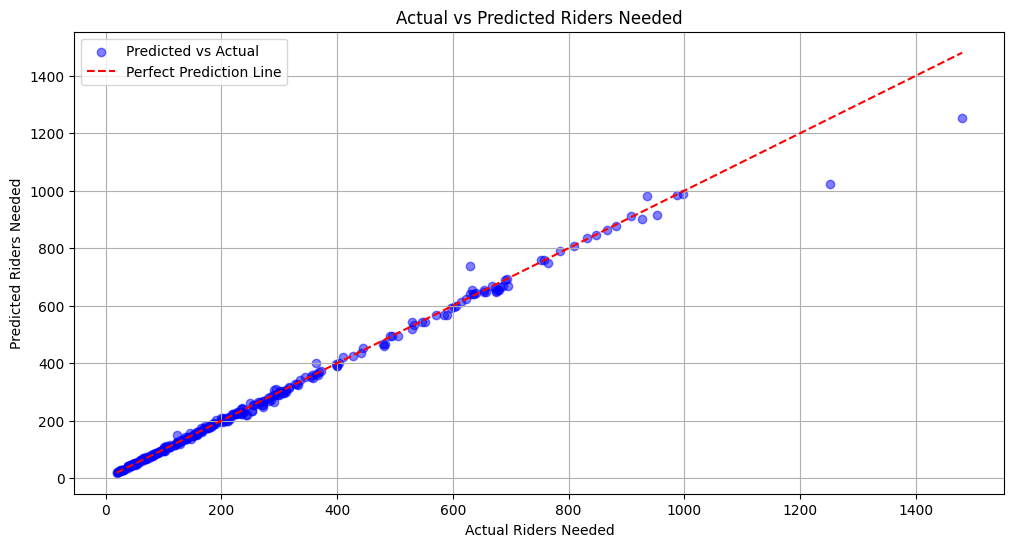

In [28]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_riders, alpha=0.5, label='Predicted vs Actual', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')  # Diagonal line
plt.xlabel('Actual Riders Needed')
plt.ylabel('Predicted Riders Needed')
plt.title('Actual vs Predicted Riders Needed')
plt.legend()
plt.grid(True)
plt.show()


# Order Assignment and Delivery Planning (with OTD)


In [29]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("GOOGLE_MAPS_API_KEY")

In [30]:
!pip install googlemaps


  Preparing metadata (setup.py) ... - \ done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40711 sha256=82aa5a765ec780e0824ae01a48319f0144732cbed684816dafba8e3a34d9b8ce
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [31]:
!pip install hdbscan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.8 MB/s eta 0:00:00


In [32]:
!pip install folium


In [33]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import googlemaps
import random
from geopy.distance import geodesic
import hdbscan
from datetime import datetime
import folium

In [34]:
gmaps = googlemaps.Client(key=secret_value_0)

In [35]:
training_serving_sizes = np.random.choice([250, 500, 750],100) 

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(training_serving_sizes.reshape(-1, 1))  # Fit on training data

def generate_simulated_data(num_orders):
    np.random.seed(42)  # For reproducibility
    order_ids = range(1, num_orders + 1)
    latitudes = np.random.uniform(28.5, 28.7, num_orders)  # Random latitudes within a small range
    longitudes = np.random.uniform(77.0, 77.2, num_orders)  # Random longitudes within a small range
    serving_sizes = np.random.choice([250, 500, 750], num_orders)  # Random serving sizes
    
    # Using Model from case 1 to predict cooking time
    serving_sizes_scaled = scaler.transform(serving_sizes.reshape(-1, 1))
    predicted_cooking_times = best_paneer_model.predict(serving_sizes_scaled)
    delivery_time = np.random.uniform(10, 40, num_orders)
    
    orders_df = pd.DataFrame({
        'order_id': order_ids,
        'latitude': latitudes,
        'longitude': longitudes,
        'serving_size': serving_sizes,
        'predicted_cooking_time': predicted_cooking_times,
        'delivery_time' : delivery_time
    })
    
    return orders_df

# Generate simulated order data
num_orders = 50
orders_df = generate_simulated_data(num_orders)
print(orders_df.head())

   order_id   latitude  longitude  serving_size  predicted_cooking_time  \
0         1  28.574908  77.193917           750               64.704834   
1         2  28.690143  77.155027           750               64.704834   
2         3  28.646399  77.187900           250               23.560534   
3         4  28.619732  77.178965           250               23.560534   
4         5  28.531204  77.119580           500               42.761574   

   delivery_time  
0      20.128455  
1      38.287291  
2      19.696088  
3      25.563719  
4      31.090569  


In [36]:
# Step 2: HDBSCAN Clustering
def cluster_orders_hdbscan(orders_df, min_cluster_size=5):
    coords = orders_df[['latitude', 'longitude']].to_numpy()
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, metric='haversine')
    orders_df['Cluster'] = clusterer.fit_predict(np.radians(coords))
    return orders_df

# Perform clustering
orders_df = cluster_orders_hdbscan(orders_df, min_cluster_size=5)
print("Clustering Results:")
print(orders_df.head())

Clustering Results:
   order_id   latitude  longitude  serving_size  predicted_cooking_time  \
0         1  28.574908  77.193917           750               64.704834   
1         2  28.690143  77.155027           750               64.704834   
2         3  28.646399  77.187900           250               23.560534   
3         4  28.619732  77.178965           250               23.560534   
4         5  28.531204  77.119580           500               42.761574   

   delivery_time  Cluster  
0      20.128455       -1  
1      38.287291       -1  
2      19.696088       -1  
3      25.563719        1  
4      31.090569        1  


In [37]:
# Step 3: Rider Assignment Based on Cluster Size and Capacity
def assign_riders_to_clusters(orders_df, rider_capacity):
    clusters = orders_df.groupby('Cluster').size().reset_index(name='NumOrders')
    clusters = clusters.sort_values(by='NumOrders', ascending=False)
    
    rider_assignments = {}
    available_riders = list(range(len(clusters)))
    
    for cluster_id in clusters['Cluster']:
        cluster_orders = orders_df[orders_df['Cluster'] == cluster_id]
        num_orders = len(cluster_orders)
        
        for rider in available_riders:
            if num_orders <= rider_capacity:
                rider_assignments[rider] = cluster_orders['order_id'].tolist()
                available_riders.remove(rider)
                break
            else:
                rider_assignments[rider] = cluster_orders.iloc[:rider_capacity]['order_id'].tolist()
                cluster_orders = cluster_orders.iloc[rider_capacity:]
                available_riders.remove(rider)
    
    return rider_assignments

# Rider assignment
rider_capacity = 5  # Example max capacity per rider
rider_assignments = assign_riders_to_clusters(orders_df, rider_capacity)
print("Rider Assignments:")
print(rider_assignments)

Rider Assignments:
{0: [1, 2, 3, 6, 7], 2: [8, 9, 10, 11, 12], 1: [4, 5, 16, 18, 21]}


In [38]:
# Step 4: Calculate OTD (On-Time Delivery)
def calculate_otd(orders_df, rider_assignments):
    otd_results = {}
    for rider, orders in rider_assignments.items():
        total_cooking_time = 0
        for order_id in orders:
            order_info = orders_df[orders_df['order_id'] == order_id]
            delivery_time = np.max(order_info['delivery_time'].values[0])
        otd_results[rider] = delivery_time <= 30
    
    return otd_results

# Calculate OTD
otd_results = calculate_otd(orders_df, rider_assignments)
print("OTD Results:")
print(otd_results)

OTD Results:
{0: False, 2: True, 1: True}


### Calculate the Minimum Delivery Cost as well as Optimizing Delivery Route Using Google Maps API

In [39]:
import googlemaps
import folium
from datetime import datetime
import random

# Step 5: Optimize Delivery Route Using Google Maps API

# Step 1: Generate Synthetic Data for Riders, Restaurant, and Delivery Locations
def generate_synthetic_locations(num_deliveries):
    # Rider's original location
    rider_location = (26.9124, 75.7873)  # Jaipur, India (example)

    # Restaurant's location
    restaurant_location = (26.8858, 75.6500)  # Random point near Jaipur

    # Delivery addresses
    delivery_locations = []
    for _ in range(num_deliveries):
        lat = random.uniform(26.8500, 26.9500)
        lon = random.uniform(75.7000, 75.8500)
        delivery_locations.append((lat, lon))

    return rider_location, restaurant_location, delivery_locations

# Generate synthetic data
rider_location, restaurant_location, delivery_locations = generate_synthetic_locations(3)

# Step 3: Route Generation Function with Minimum Distance Logic
def generate_route_min_distance(origin, restaurant, delivery_locations):
    waypoints = []
    current_location = restaurant

    # Sort delivery locations by distance from the restaurant
    remaining_locations = delivery_locations.copy()

    while remaining_locations:
        distances = [(loc, calculate_distance(current_location, loc)) for loc in remaining_locations]
        next_location = min(distances, key=lambda x: x[1])[0]
        waypoints.append(next_location)
        remaining_locations.remove(next_location)
        current_location = next_location

    # Generate the route from rider to restaurant, then to all waypoints
    route = gmaps.directions(
        origin=origin,
        destination=waypoints[-1],
        waypoints=[restaurant] + waypoints[:-1],
        mode="driving",
        departure_time=datetime.now()
    )
    return route, waypoints

# Step 4: Calculate the Delivery Cost for Each Segment
def calculate_segment_cost(distance, cost_per_km):
    return distance * cost_per_km

# Step 5: Calculate Distances Using Google Maps API
def calculate_distance(point_a, point_b):
    result = gmaps.distance_matrix(origins=point_a, destinations=point_b, mode="driving")
    distance = result['rows'][0]['elements'][0]['distance']['value'] / 1000  # Convert to km
    return distance

# Step 6: Visualize the Delivery Route and Costs
def visualize_route(route, first_mile_distance, last_mile_distances, return_mile_distance, total_cost):
    # Extracting the steps from the route
    steps = route[0]['legs'][0]['steps']

    # Extracting start and end coordinates
    coordinates = [(step['start_location']['lat'], step['start_location']['lng']) for step in steps]
    coordinates.append((steps[-1]['end_location']['lat'], steps[-1]['end_location']['lng']))

    # Start, End, and Restaurant points
    start_point = coordinates[0]
    restaurant_point = (restaurant_location[0], restaurant_location[1])
    end_point = coordinates[-1]

    # Create a map centered around the rider's original location
    mymap = folium.Map(location=start_point, zoom_start=14)

    # Add markers for start (rider), restaurant, and each delivery point
    folium.Marker(location=start_point, popup="Rider's Current Location", icon=folium.Icon(color='green')).add_to(mymap)
    folium.Marker(location=restaurant_point, popup=f"Restaurant Location: First Mile {first_mile_distance:.2f} km, Cost: Rs {calculate_segment_cost(first_mile_distance, 1):.2f}", icon=folium.Icon(color='blue')).add_to(mymap)
    folium.Marker(location=end_point, popup="End (Last Delivery)", icon=folium.Icon(color='red')).add_to(mymap)

    # Add markers for each delivery point with the last mile cost
    for i, loc in enumerate(delivery_locations):
        last_mile_cost = calculate_segment_cost(last_mile_distances[i], 2.5)  # Rs 2.5/km for last mile
        folium.Marker(location=loc, 
                      popup=f"Delivery Point {i+1}: Last Mile {last_mile_distances[i]:.2f} km, Cost: Rs {last_mile_cost:.2f}",
                      icon=folium.Icon(color='purple')).add_to(mymap)

    # Add route polylines for First Mile, Last Miles, and Return Mile
    folium.PolyLine(locations=[rider_location, restaurant_location], color='orange', weight=5, popup=f"First Mile: {first_mile_distance:.2f} km, Cost: Rs {calculate_segment_cost(first_mile_distance, 1):.2f}").add_to(mymap)

    # Add a polyline from restaurant to the first delivery point (shortest path)
    folium.PolyLine(locations=[restaurant_location, delivery_locations[0]], color='blue', weight=5, popup="Shortest Path: Restaurant to First Delivery").add_to(mymap)

    for i in range(len(delivery_locations) - 1):
        folium.PolyLine(locations=[delivery_locations[i], delivery_locations[i+1]], color='blue', weight=5).add_to(mymap)

    folium.PolyLine(locations=[delivery_locations[-1], rider_location], color='black', weight=5, popup=f"Return Mile: {return_mile_distance:.2f} km, Cost: Rs {calculate_segment_cost(return_mile_distance, 1):.2f}").add_to(mymap)

    # Add total cost marker
    folium.Marker(location=start_point, popup=f"Total Delivery Cost: Rs {total_cost:.2f}", icon=folium.Icon(color='green')).add_to(mymap)

    # Display the map
    return mymap

# Step 7: Calculate Total Delivery Costs and Route
first_mile_distance = calculate_distance(rider_location, restaurant_location)
route, ordered_waypoints = generate_route_min_distance(rider_location, restaurant_location, delivery_locations)
last_mile_distances = [calculate_distance(restaurant_location if i == 0 else ordered_waypoints[i-1], loc) for i, loc in enumerate(ordered_waypoints)]
return_mile_distance = calculate_distance(ordered_waypoints[-1], rider_location)

# Total cost calculation
total_first_mile_cost = calculate_segment_cost(first_mile_distance, 2.5)  # Rs 1/km for first mile
total_last_mile_cost = sum([calculate_segment_cost(dist, 2.6) for dist in last_mile_distances])  # Rs 2.5/km for last mile
total_return_mile_cost = calculate_segment_cost(return_mile_distance, 1.3)  # Rs 1/km for return mile

total_cost = total_first_mile_cost + total_last_mile_cost + total_return_mile_cost
print(f"Total Delivery Cost: Rs {total_cost:.2f}")

# Step 8: Visualize the updated route
route_map = visualize_route(route, first_mile_distance, last_mile_distances, return_mile_distance, total_cost)
route_map.save('/kaggle/working/route_map.html')  # Save the map as an HTML file

# Display the route map
route_map


Total Delivery Cost: Rs 119.19


### Step 6: Assign Orders to Riders Considering FM, LM, and OTD

In [40]:
# Define the riders_df DataFrame
def generate_simulated_riders(num_riders):
    np.random.seed(42)  # For reproducibility
    rider_ids = range(1, num_riders + 1)
    latitudes = np.random.uniform(28.5, 28.7, num_riders)  # Random latitudes within a small range
    longitudes = np.random.uniform(77.0, 77.2, num_riders)  # Random longitudes within a small range
    
    riders_df = pd.DataFrame({
        'rider_id': rider_ids,
        'latitude': latitudes,
        'longitude': longitudes
    })
    
    return riders_df

# Generate simulated rider data
num_riders = 10  # Example number of riders
riders_df = generate_simulated_riders(num_riders)

# Step 6: Assign Orders to Riders Considering FM, LM, and OTD
def assign_orders_to_riders(orders_df, riders_df, max_capacity_per_rider):
    
    # Cluster orders by geographic proximity (k-means clustering)
    kmeans = KMeans(n_clusters=len(riders_df), random_state=42, n_init=10)

    orders_df['Cluster'] = kmeans.fit_predict(orders_df[['latitude', 'longitude']])
    
    # Assign orders to riders based on clusters and maximum capacity
    assigned_orders = []
    for cluster_id, orders_in_cluster in orders_df.groupby('Cluster'):
        assigned_riders = riders_df.sample(min(len(orders_in_cluster) // max_capacity_per_rider + 1, len(riders_df)))
        for rider, order in zip(assigned_riders.index, orders_in_cluster.index):
            assigned_orders.append((rider, order, orders_df.loc[order, 'predicted_cooking_time']))
    
    return assigned_orders

# Display the final results
assigned_orders = assign_orders_to_riders(orders_df, riders_df, rider_capacity)
print('''Final Assigned Orders: 
Each tuple in the list indicates ( rider_index, order_id, predicted_cooking_time)''')
print(assigned_orders)

Final Assigned Orders: 
Each tuple in the list indicates ( rider_index, order_id, predicted_cooking_time)
[(1, 17, 42.761574), (8, 8, 23.560534), (0, 6, 64.704834), (5, 16, 42.761574), (4, 7, 64.704834), (8, 9, 64.704834), (2, 10, 64.704834), (4, 0, 64.704834), (2, 5, 23.560534), (5, 4, 42.761574), (2, 15, 64.704834), (1, 1, 64.704834), (3, 28, 64.704834), (2, 2, 23.560534), (4, 3, 23.560534)]


In [41]:
# Visualize the results having a better visualization by showcasing clusters with polylines

import folium
from folium.plugins import MarkerCluster
# Visualize the rider assignments and clusters
def visualize_assignments_and_clusters(orders_df, assigned_orders, clusters, map_center):
    # Create a base map centered around the map_center
    delivery_map = folium.Map(location=map_center, zoom_start=12)

    # Create a color dictionary for different clusters
    cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 
                      'beige', 'darkblue', 'darkgreen', 'cadetblue', 'pink', 'lightblue']
    color_dict = {cluster: cluster_colors[i % len(cluster_colors)] for i, cluster in enumerate(clusters)}

    # Add markers for each order in the orders_df
    marker_cluster = MarkerCluster().add_to(delivery_map)
    for rider, order_id, _ in assigned_orders:
        order = orders_df[orders_df['order_id'] == order_id]
        if not order.empty:
            order = order.iloc[0]
            folium.Marker(
                location=(order['latitude'], order['longitude']),
                popup=f"Order ID: {order_id}, Rider: {rider}, Cluster: {order['Cluster']}",
                icon=folium.Icon(color=color_dict[order['Cluster']])
            ).add_to(marker_cluster)

    # Draw cluster boundaries (optional, but can help visualize cluster areas)
    for cluster_id in clusters:
        cluster_orders = orders_df[orders_df['Cluster'] == cluster_id]
        if len(cluster_orders) > 2:  # To avoid drawing polygons for clusters with fewer points
            points = list(zip(cluster_orders['latitude'], cluster_orders['longitude']))
            folium.PolyLine(points, color=color_dict[cluster_id], weight=2.5, opacity=0.7).add_to(delivery_map)
    
    return delivery_map

# Visualize the assignments and clusters
map_center = [orders_df['latitude'].mean(), orders_df['longitude'].mean()]
clusters = orders_df['Cluster'].unique()
delivery_map = visualize_assignments_and_clusters(orders_df, assigned_orders, clusters, map_center)

# Save the map as an HTML file and display it
delivery_map.save("/kaggle/working/delivery_map.html")
delivery_map


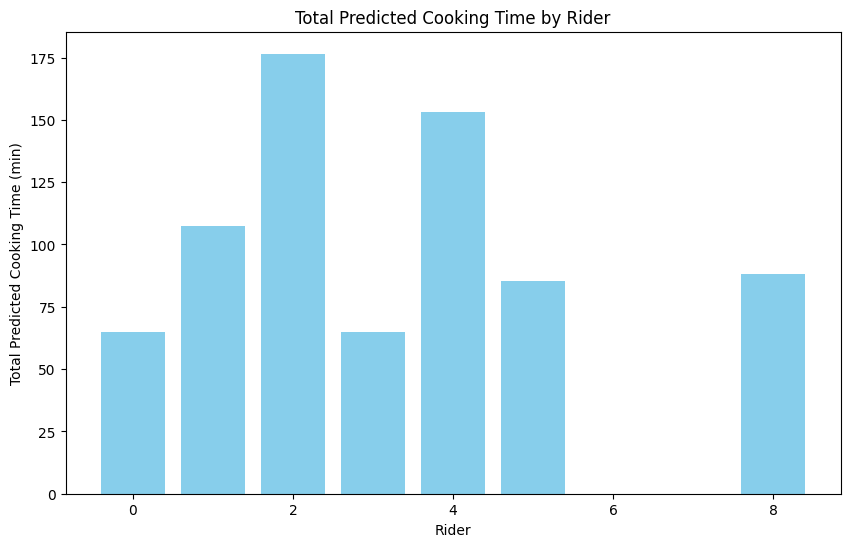

In [42]:
# Visualize the results with distribuion of riders w.r.t total cooking time 
# as well as visulazing the Assigned Orders on a Map Without Clusters instead by cooking time
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

# Step 7: Visualize the Assigned Orders on a Map Without Clusters
def visualize_assigned_orders(orders_df, assigned_orders):
    # Initialize map centered around the average coordinates
    m = folium.Map(location=[orders_df['latitude'].mean(), orders_df['longitude'].mean()], zoom_start=13)

    # Predefined folium colors
    folium_colors = [
        'orange', 'lightgray', 'lightred', 'darkblue', 'beige', 'darkpurple', 'gray', 'green', 
        'pink', 'blue', 'lightgreen', 'darkred', 'lightblue', 'red', 'darkgreen', 'purple', 
        'white', 'black', 'cadetblue'
    ]

    # Create a color dictionary for riders using folium-supported colors
    color_dict = {rider: random.choice(folium_colors) for rider, _, _ in assigned_orders}

    # Add markers for each order
    for rider, order_idx, _ in assigned_orders:
        order = orders_df.iloc[order_idx]
        folium.Marker(
            location=[order['latitude'], order['longitude']],
            popup=f"Order ID: {order['order_id']} | Rider: {rider} | Cooking Time: {order['predicted_cooking_time']:.2f}",
            icon=folium.Icon(color=color_dict[rider])
        ).add_to(m)
    
    return m

# Step 8: Visualize the Predicted Cooking Times by Rider
def plot_cooking_times(orders_df, assigned_orders):
    # Convert the assigned_orders list into a DataFrame for easier plotting
    assigned_df = pd.DataFrame(assigned_orders, columns=['Rider', 'OrderIndex', 'PredictedCookingTime'])
    
    # Group by Rider and sum the Predicted Cooking Times
    cooking_times = assigned_df.groupby('Rider')['PredictedCookingTime'].sum().reset_index()
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(cooking_times['Rider'], cooking_times['PredictedCookingTime'], color='skyblue')
    plt.xlabel('Rider')
    plt.ylabel('Total Predicted Cooking Time (min)')
    plt.title('Total Predicted Cooking Time by Rider')
    plt.show()

# Visualize the assigned orders on the map
map_visualization = visualize_assigned_orders(orders_df, assigned_orders)
map_visualization.save('/kaggle/working/assigned_orders_map.html')  # Save as an HTML file to view interactively

# Plot the predicted cooking times
plot_cooking_times(orders_df, assigned_orders)
map_visualization


# Minimizing the delivery cost 

# Viable Tiffin Services Model 

In [43]:
def generate_tiffin_data(num_orders):
    np.random.seed(42)
    customer_ids = range(1, num_orders + 1)
    latitudes = np.random.uniform(28.5, 28.7, num_orders)
    longitudes = np.random.uniform(77.0, 77.2, num_orders)
    meal_plans = np.random.choice(['30 days', '15 days', '21 days', 'Adhoc'], num_orders)
    meal_types = np.random.choice(['Lunch', 'Dinner', 'Breakfast'], num_orders)
    customizations = np.random.choice([True, False], num_orders)
    
    tiffin_df = pd.DataFrame({
        'customer_id': customer_ids,
        'latitude': latitudes,
        'longitude': longitudes,
        'meal_plan': meal_plans,
        'meal_type': meal_types,
        'customization': customizations
    })
    
    return tiffin_df

tiffin_df = generate_tiffin_data(100)
tiffin_df.head()

,customer_id,latitude,longitude,meal_plan,meal_type,customization
0,1,28.574908,77.006286,Adhoc,Breakfast,False
1,2,28.690143,77.127282,Adhoc,Lunch,False
2,3,28.646399,77.062871,21 days,Lunch,True
3,4,28.619732,77.101714,30 days,Breakfast,True
4,5,28.531204,77.181513,Adhoc,Lunch,False


In [44]:
def cluster_customers(tiffin_df, num_clusters):
    coords = tiffin_df[['latitude', 'longitude']].to_numpy()
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    tiffin_df['Cluster'] = kmeans.fit_predict(coords)
    return tiffin_df

num_clusters = 5
tiffin_df = cluster_customers(tiffin_df, num_clusters)

def select_vendors(tiffin_df):
    vendors = []
    for cluster in tiffin_df['Cluster'].unique():
        cluster_data = tiffin_df[tiffin_df['Cluster'] == cluster]
        vendor_location = (cluster_data['latitude'].mean(), cluster_data['longitude'].mean())
        vendors.append(vendor_location)
    return vendors

vendors = select_vendors(tiffin_df)


In [45]:
def optimize_delivery_route(vendors, customer_location):
    best_route = None
    min_cost = float('inf')
    
    for vendor in vendors:
        # Calculate distance and cost
        first_mile = geodesic(vendor, customer_location).km
        last_mile = geodesic(customer_location, vendor).km
        return_mile = first_mile  # For simplicity, considering the return mile as the first mile
        total_cost = first_mile + 2.5 * last_mile + return_mile
        
        if total_cost < min_cost:
            min_cost = total_cost
            best_route = (vendor, customer_location, total_cost)
    
    return best_route

customer_location = (tiffin_df.iloc[0]['latitude'], tiffin_df.iloc[0]['longitude'])
best_route = optimize_delivery_route(vendors, customer_location)
print("Best Route:", best_route)


Best Route: ((28.604343919592278, 77.037118160995), (28.57490802376947, 77.00628583713734), 19.993140097297914)


In [46]:
def visualize_best_route(route):
    vendor_location, customer_location, cost = route
    
    # Create a map centered around the vendor
    route_map = folium.Map(location=vendor_location, zoom_start=14)
    
    # Add vendor and customer markers
    folium.Marker(location=vendor_location, popup="Vendor", icon=folium.Icon(color='green')).add_to(route_map)
    folium.Marker(location=customer_location, popup="Customer", icon=folium.Icon(color='red')).add_to(route_map)
    
    # Add a line representing the route
    folium.PolyLine(locations=[vendor_location, customer_location], color='blue', weight=5).add_to(route_map)
    
    # Display the cost as a popup
    folium.Marker(location=((vendor_location[0] + customer_location[0]) / 2, (vendor_location[1] + customer_location[1]) / 2),
                  popup=f"Total Cost: {cost} Rs").add_to(route_map)
    
    return route_map

route_map = visualize_best_route(best_route)
route_map.save('/kaggle/working/tiffin_delivery_route.html')
route_map

# LOV,MOV, Restaurant Partner Commission Analysis

In [47]:
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestRegressor
# Sample Data Creation
np.random.seed(42)
data = {
    'Order_Value': np.random.uniform(100, 1000, 1000),
    'Order_Frequency': np.random.randint(1, 10, 1000),
    'Delivery_Cost': np.random.uniform(10, 50, 1000),
    'CAC': np.random.uniform(50, 200, 1000),
    'Order_Distance': np.random.uniform(1, 15, 1000),
    'Order_Time': np.random.uniform(10, 60, 1000),
    'Commission_Rate': np.random.uniform(0.1, 0.25, 1000)
}

df = pd.DataFrame(data)

# Add a Profit column
df['Profit'] = df['Order_Value'] * df['Commission_Rate'] - df['Delivery_Cost'] - df['CAC']
df.head()

,Order_Value,Order_Frequency,Delivery_Cost,CAC,Order_Distance,Order_Time,Commission_Rate,Profit
0,437.086107,8,13.967124,99.828655,11.533570,25.805066,0.207805,-22.967149
1,955.642876,3,26.059773,154.042709,8.438116,12.787043,0.187935,-0.503427
2,758.794548,8,42.002839,165.668422,10.484133,40.490638,0.173855,-75.750992
3,638.792636,5,18.161425,148.197603,6.998411,22.040191,0.128847,-84.052280
4,240.416776,1,32.203398,72.739261,11.240950,29.340362,0.169590,-64.170272


In [48]:
# Feature Selection and Splitting Data
X = df[['Order_Value', 'Order_Frequency', 'Delivery_Cost', 'CAC', 'Order_Distance', 'Order_Time', 'Commission_Rate']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error: {mse}")
# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")


Model Mean Squared Error: 129.71425281427793
R2 Score: 0.9673


In [49]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# After replacing infinities, you can drop or fill NaN values as needed
df.dropna(inplace=True)

In [50]:
# Objective Function to Maximize Profit
def objective(params):
    LOV, MOV, commission_rate = params
    df['LOV_Impact'] = np.where(df['Order_Value'] >= LOV, 1, 0)
    df['MOV_Impact'] = np.where(df['Order_Value'] <= MOV, 1, 0)
    
    df['Adjusted_Profit'] = (df['Order_Value'] * commission_rate * df['LOV_Impact'] * df['MOV_Impact']) - df['Delivery_Cost'] - df['CAC']
    total_profit = df['Adjusted_Profit'].sum()
    
    # We want to minimize the negative of profit (to maximize profit)
    return -total_profit

# Initial Guess for LOV, MOV, and Commission Rate
initial_guess = [200, 1000, 0.2]

# Bounds for LOV, MOV, and Commission Rate
bounds = [(100, 500), (500, 1000), (0.1, 0.25)]

# Perform Optimization
result = minimize(objective, initial_guess, bounds=bounds, method='TNC')

# Optimal LOV, MOV, and Commission Rate
optimal_LOV, optimal_MOV, optimal_commission_rate = result.x
print(f"Optimal LOV: {optimal_LOV}, Optimal MOV: {optimal_MOV}, Optimal Commission Rate: {optimal_commission_rate}")


Optimal LOV: 200.0, Optimal MOV: 1000.0, Optimal Commission Rate: 0.25


In [51]:
# Apply Optimized Parameters
df['LOV_Impact'] = np.where(df['Order_Value'] >= optimal_LOV, 1, 0)
df['MOV_Impact'] = np.where(df['Order_Value'] <= optimal_MOV, 1, 0)

df['Final_Profit'] = (df['Order_Value'] * optimal_commission_rate * df['LOV_Impact'] * df['MOV_Impact']) - df['Delivery_Cost'] - df['CAC']

# Total Profit after Optimization
total_profit_after_optimization = df['Final_Profit'].sum()
print(f"Total Profit after Optimization: {-total_profit_after_optimization}")


Total Profit after Optimization: 23568.19890547188


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


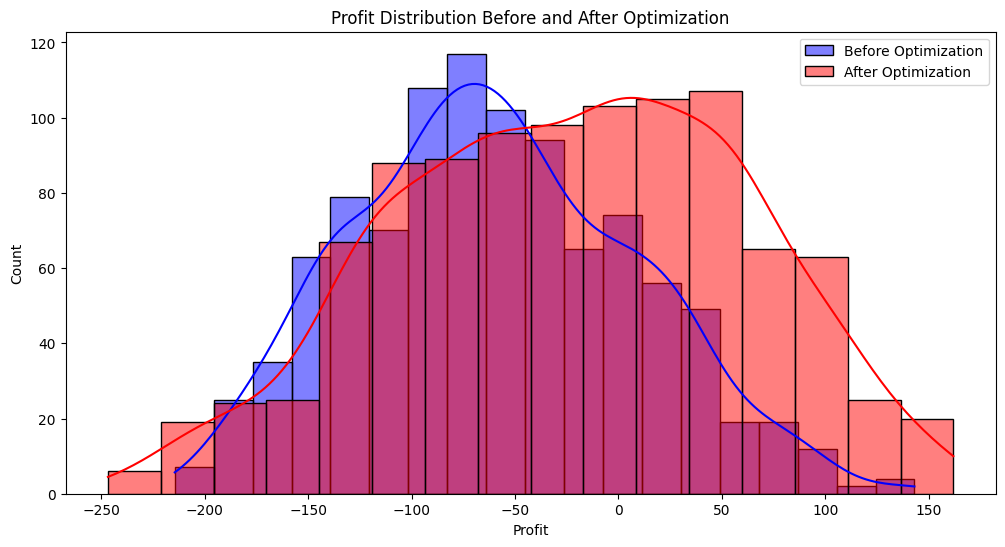

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Profit Distribution Before and After Optimization
plt.figure(figsize=(12, 6))
sns.histplot(df['Profit'], color='blue', label='Before Optimization', kde=True)
sns.histplot(df['Final_Profit'], color='red', label='After Optimization', kde=True)
plt.title('Profit Distribution Before and After Optimization')
plt.legend()
plt.show()
